In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)

training_set = train_datagen.flow_from_directory('flowers/train',
                                                 target_size=(224,224),
                                                    color_mode="rgb",
                                                    subset="training",
                                                    batch_size=32,
                                                    shuffle=True)

Found 2336 images belonging to 5 classes.


In [21]:
valid_generator=datagen.flow_from_directory(
                                                directory="flowers/train",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                batch_size=32,
                                                shuffle=True)

Found 410 images belonging to 5 classes.


In [22]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

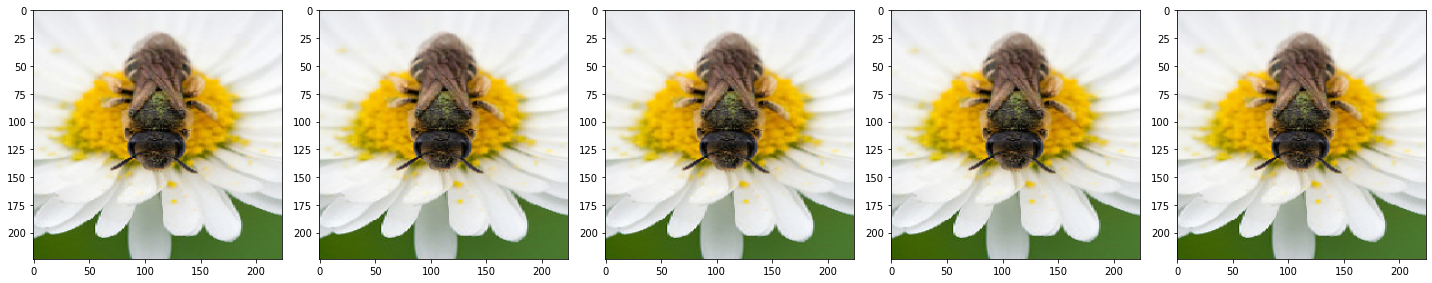

In [23]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [24]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [25]:
from tensorflow.keras.layers import Conv2D

In [26]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - # Adding a first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

###ann layer
tf.keras.layers.Dropout(0.5)
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
tf.keras.layers.Dropout(0.5)

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [27]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = valid_generator, epochs = 1)

73/73 [==============================] - 175s 2s/step - loss: 2.4010 - accuracy: 0.3142 - val_loss: 1.1922 - val_accuracy: 0.5512


In [34]:
import pandas as pd
import numpy as np

In [30]:
test=pd.read_csv("flowers/Testing_set_flower.csv")
sub=pd.read_csv("flowers/sample_submission.csv")

In [31]:
test_generator=datagen.flow_from_dataframe(
                                            dataframe=test,
                                            directory="flowers/test",
                                            x_col="filename",
                                            y_col=None,
                                            batch_size=1,
                                            seed=42,
                                            shuffle=False,
                                            class_mode=None,
                                            target_size=(224, 224))

Found 924 validated image filenames.


In [32]:
pred1=(cnn.predict(test_generator,verbose=1))

924/924 [==============================] - 27s 29ms/step


In [39]:
pred = np.argmax(pred1,axis=1)

In [40]:
pred

array([1, 3, 1, 1, 2, 4, 1, 3, 3, 1, 0, 1, 3, 2, 2, 3, 1, 2, 1, 1, 1, 2,
       1, 4, 3, 1, 1, 4, 0, 3, 1, 3, 0, 1, 1, 0, 0, 1, 3, 0, 1, 0, 1, 3,
       2, 4, 3, 3, 3, 0, 1, 3, 3, 3, 1, 0, 2, 1, 3, 1, 1, 3, 1, 1, 3, 1,
       0, 1, 4, 2, 0, 2, 4, 3, 1, 3, 1, 3, 4, 0, 1, 2, 1, 3, 1, 1, 4, 4,
       3, 4, 1, 3, 4, 3, 0, 2, 0, 3, 3, 0, 1, 1, 1, 4, 1, 3, 3, 1, 3, 1,
       1, 3, 0, 1, 1, 3, 2, 4, 2, 1, 0, 2, 0, 0, 1, 3, 1, 4, 1, 3, 1, 3,
       3, 4, 2, 1, 1, 1, 1, 1, 0, 1, 1, 4, 3, 3, 1, 1, 3, 1, 1, 0, 2, 1,
       4, 1, 0, 1, 0, 0, 4, 4, 1, 1, 4, 4, 1, 2, 3, 4, 1, 0, 0, 2, 0, 1,
       1, 1, 3, 1, 0, 4, 1, 1, 4, 3, 1, 3, 0, 4, 1, 3, 1, 0, 1, 1, 3, 1,
       4, 3, 1, 4, 2, 3, 1, 0, 4, 4, 2, 0, 2, 1, 2, 1, 4, 1, 1, 1, 1, 3,
       1, 2, 3, 4, 1, 0, 1, 0, 0, 0, 3, 1, 1, 3, 4, 3, 3, 3, 0, 0, 3, 0,
       2, 4, 4, 0, 4, 0, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 2, 3, 1, 1,
       0, 0, 0, 3, 4, 0, 2, 1, 4, 0, 0, 4, 1, 4, 4, 1, 0, 2, 3, 4, 1, 0,
       3, 1, 4, 4, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 0,

In [44]:
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [48]:
sub["prediction"]=pred
sub["prediction"]=sub["prediction"].map({0:'daisy',1:'dandelion',2:'rose',3:'sunflower',4:'tupil'})

In [49]:
sub.to_csv('file.csv',index=False)